In [100]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [101]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import datetime

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [102]:
File_path="C:\\Users\\HARITHA\Desktop\\Advanced_Regression_Assignment\\"

In [103]:
house_price=pd.read_csv(File_path+"train.csv",encoding="utf-8")

In [4]:
house_price.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_price.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(house_price.info())
print(house_price.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

##### Let's visualize the distribution of sale price

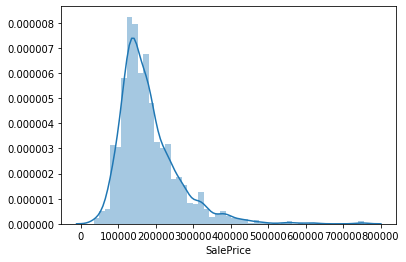

In [7]:
sns.distplot(house_price['SalePrice'])

#### So looking at the graph it seems tat we need to transform the prices that would make sure tha the model's performance is boosted. As its skewed, we are going to transform

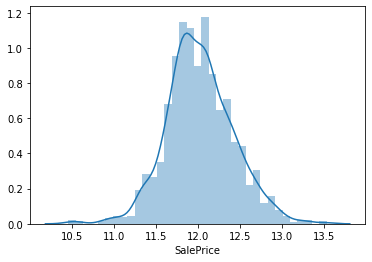

In [8]:
sns.distplot(np.log(house_price["SalePrice"]));

In [9]:
house_price["TransformedPrice"]=np.log(house_price["SalePrice"])

#### Let's drop Id column as it is not useful for saleprice analysis

In [10]:
house_price.drop('Id',axis=1,inplace=True)

#### Let's check for missing values in the data

In [11]:
house_price_nulls=house_price.isnull().sum().sort_values

In [12]:
round(100*house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageQual       5.55
GarageCond       5.55
GarageFinish     5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtCond         2.53
BsmtFinType1     2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
RoofStyle        0.00
dtype: float64

In [13]:
house_price.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


In [14]:
house_price.drop('MiscFeature',axis=1,inplace=True)

#### Relace'NA' values which are not actually missing values but are meaningful according to the data dictionary

In [15]:
house_price.PoolQC.fillna('None',inplace=True)
house_price.Alley.fillna('None',inplace=True)
house_price.Fence.fillna('None',inplace=True)
house_price.FireplaceQu.fillna('None',inplace=True)
house_price.BsmtFinType1.fillna('None',inplace=True)
house_price.GarageType.fillna('None',inplace=True)
house_price.GarageCond.fillna('None',inplace=True)
house_price.GarageYrBlt.fillna(-1,inplace=True)
house_price.GarageFinish.fillna('None',inplace=True)
house_price.GarageQual.fillna('None',inplace=True)
house_price.BsmtExposure.fillna('None',inplace=True)
house_price.BsmtCond.fillna('None',inplace=True)
house_price.BsmtQual.fillna('None',inplace=True)
house_price.BsmtFinType2.fillna('None',inplace=True)

In [16]:
round(100*house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(20)

LotFrontage         17.74
MasVnrType           0.55
MasVnrArea           0.55
Electrical           0.07
TransformedPrice     0.00
BsmtQual             0.00
Exterior1st          0.00
Exterior2nd          0.00
ExterQual            0.00
ExterCond            0.00
Foundation           0.00
BsmtCond             0.00
RoofStyle            0.00
BsmtExposure         0.00
BsmtFinType1         0.00
BsmtFinSF1           0.00
BsmtFinType2         0.00
BsmtFinSF2           0.00
BsmtUnfSF            0.00
RoofMatl             0.00
dtype: float64

#### Impute missing values of LotFrontage with median:

In [17]:
house_price["LotFrontage"].fillna(house_price.LotFrontage.median(), inplace = True)

In [18]:
house_price["Electrical"].fillna(house_price.Electrical.mode()[0], inplace = True)

In [19]:
round(100*house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(20)

MasVnrType          0.55
MasVnrArea          0.55
TransformedPrice    0.00
SalePrice           0.00
RoofMatl            0.00
Exterior1st         0.00
Exterior2nd         0.00
ExterQual           0.00
ExterCond           0.00
Foundation          0.00
BsmtQual            0.00
BsmtCond            0.00
BsmtExposure        0.00
BsmtFinType1        0.00
BsmtFinSF1          0.00
BsmtFinType2        0.00
BsmtFinSF2          0.00
BsmtUnfSF           0.00
TotalBsmtSF         0.00
RoofStyle           0.00
dtype: float64

#### remove NA values as there are just 8 records : MasVnrType

In [20]:
house_price.dropna(inplace=True)

In [21]:
round(100*house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(20)

TransformedPrice    0.0
SalePrice           0.0
RoofMatl            0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
ExterCond           0.0
Foundation          0.0
BsmtQual            0.0
BsmtCond            0.0
BsmtExposure        0.0
BsmtFinType1        0.0
BsmtFinSF1          0.0
BsmtFinType2        0.0
BsmtFinSF2          0.0
BsmtUnfSF           0.0
TotalBsmtSF         0.0
RoofStyle           0.0
dtype: float64

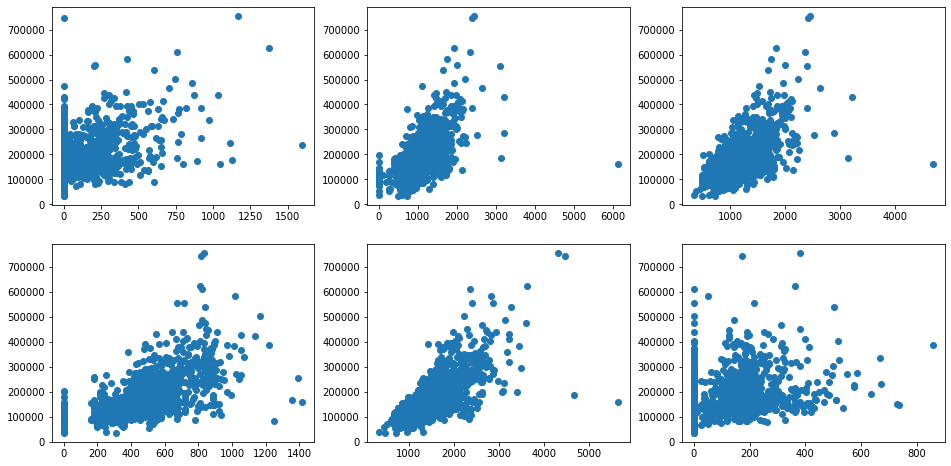

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

In [23]:
#### Hadling the outliers : taking the lower and upper quantile as 0.25 & 0.99 respectively

In [24]:
house_price.shape

(1452, 80)

In [25]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [26]:
house_price.shape

(1440, 80)

#### Dealing with ordinal categorical variables

In [27]:
# list of ordianl categorical variables
ordianl_cat_var = ['CentralAir', 'LandSlope', 'LotShape', 'ExterCond', 'ExterQual', 'HeatingQC',
                                     'KitchenQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']

In [28]:
# Converting ordinal categorical variables to numeric variables
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['LotShape'] = house_price.LotShape.map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
house_price['GarageFinish'] = house_price.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})

for column in ['ExterCond', 'ExterQual', 'HeatingQC', 'KitchenQual']:
    house_price[column] = house_price[column].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

for column in ['BsmtQual', 'BsmtCond']:
    house_price[column] = house_price[column].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

for column in ['GarageQual', 'GarageCond']:
    house_price[column] = house_price[column].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})    
    
for column in ['BsmtFinType1', 'BsmtFinType2']:
    house_price[column] = house_price[column].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

In [29]:
# Ordinal categorical variables at a glance
house_price[ordianl_cat_var].describe()

,CentralAir,LandSlope,LotShape,ExterCond,ExterQual,HeatingQC,KitchenQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageFinish,GarageQual,GarageCond
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.934028,0.057639,0.402778,2.083333,2.390972,3.145139,2.506250,3.483333,2.933333,1.622222,3.534028,1.245139,1.707639,2.806944,2.805556
std,0.248320,0.258579,0.572954,0.351706,0.572039,0.958726,0.662688,0.878118,0.555220,1.060534,2.107654,0.893364,0.892372,0.726894,0.723648
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000
50%,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,2.000000,4.000000,3.000000,1.000000,4.000000,1.000000,2.000000,3.000000,3.000000
75%,1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000,6.000000,1.000000,2.000000,3.000000,3.000000
max,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,6.000000,6.000000,3.000000,5.000000,5.000000


# Data Analysis

### Derived feature : Age of the building

In [30]:
# finding present year
year_now = datetime.datetime.now().year
year_now
# looking at year columns at a glance
year_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
house_price[year_columns].describe()
# function to convert years to age
def convert_to_age(year):
    if year > 0:
        return year_now - year
    else:
        return year
# converting columns with years to ages
age_columns = []
for column in year_columns:
    house_price[column+'_age'] = house_price[column].apply(lambda val: int(convert_to_age(val)))
    house_price.drop(column, axis=1, inplace=True) # dropping year columns
    age_columns.append(column+'_age')
# looking at age columns at a glance
house_price[age_columns].describe()

,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,48.892361,35.241667,39.176389,12.179861
std,30.256057,20.689570,25.931395,1.329731
min,10.000000,10.000000,-1.000000,10.000000
25%,20.000000,16.000000,17.000000,11.000000
50%,48.000000,26.500000,35.500000,12.000000
75%,66.250000,54.000000,58.000000,13.000000
max,148.000000,70.000000,120.000000,14.000000


### Plotting heatmap to check the corellation between varables

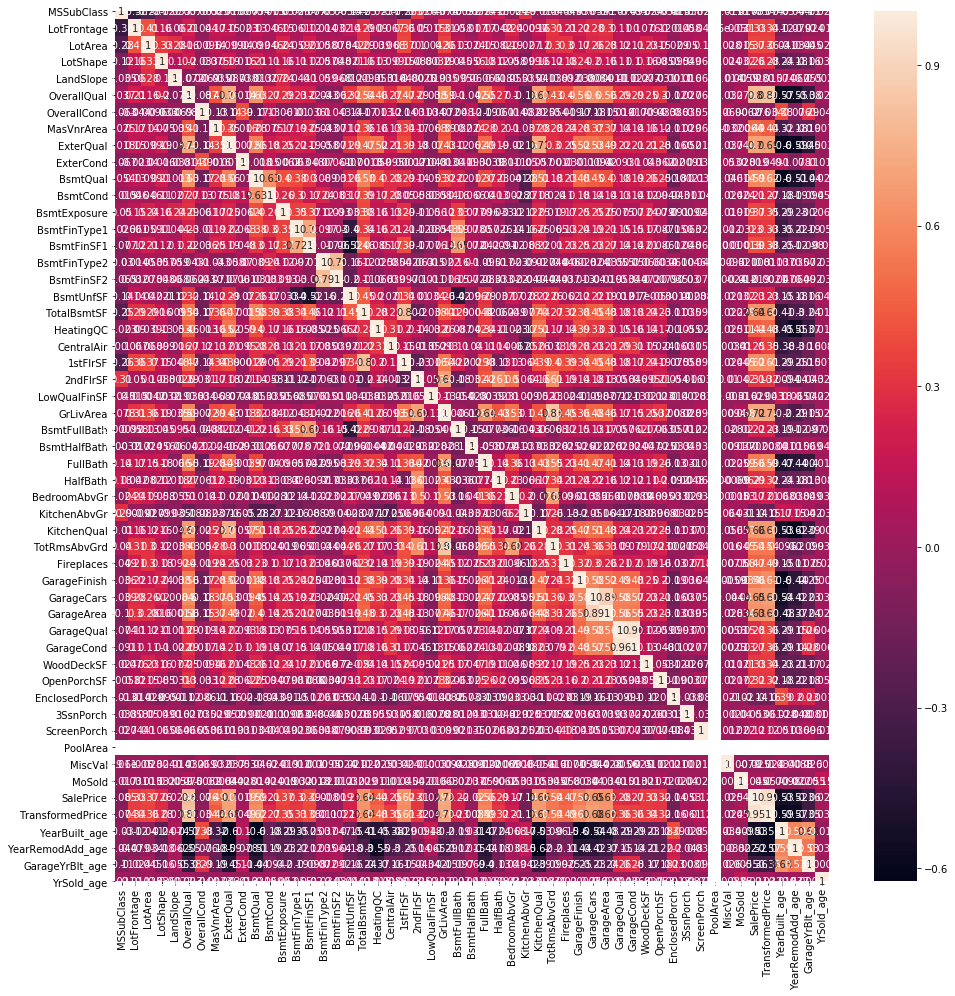

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [32]:
#Identifying highly correlated varaibles
corr_matrix=house_price.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'GarageCond', 'TransformedPrice']

In [33]:
if 'TransformedPrice' in col_to_drop :
    col_to_drop.remove('TransformedPrice')
if 'SalePrice' in col_to_drop:
    col_to_drop.remove('SalePrice')

In [34]:
#So, let's drop these columns
house_price.drop(house_price[col_to_drop], axis=1, inplace = True)
house_price.shape

(1440, 76)

In [35]:
#regenerating list of numerical and non-numerical columns
NonNumCols = []
NumCols = []

for col in list(house_price):
    if house_price[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 

In [36]:
# Removing target varible 'SalePrice' from numeric list
NumCols.remove('SalePrice')
NumCols.remove('TransformedPrice')

In [37]:
# 'MSSubClass' is actually a categorical variable so lets switch it to categorical list
NumCols.remove('MSSubClass')
NonNumCols.append('MSSubClass')
house_price['MSSubClass']=house_price['MSSubClass'].astype(str)

In [38]:
house_price.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [39]:
print(house_price.MSZoning.unique())
print(house_price.Street.unique())
print(house_price.Utilities.unique())
print(house_price.Alley.unique())
print(house_price.LotConfig.unique())
print(house_price.Condition1.unique())
print(house_price.Condition2.unique())
print(house_price.BldgType.unique())
print(house_price.LandContour.unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['AllPub' 'NoSeWa']
['None' 'Grvl' 'Pave']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['Lvl' 'Bnk' 'Low' 'HLS']


In [40]:
# list of categorical variables without ordinal variabels
dummy_cat = list(set(NonNumCols)-set(ordianl_cat_var))
dummy_cat

['Exterior1st',
 'Condition2',
 'Utilities',
 'LandContour',
 'RoofMatl',
 'Foundation',
 'RoofStyle',
 'Street',
 'SaleType',
 'MasVnrType',
 'GarageType',
 'PoolQC',
 'SaleCondition',
 'Condition1',
 'Neighborhood',
 'Fence',
 'LotConfig',
 'HouseStyle',
 'Heating',
 'PavedDrive',
 'Alley',
 'Exterior2nd',
 'MSSubClass',
 'FireplaceQu',
 'BldgType',
 'Functional',
 'Electrical',
 'MSZoning']

#### Creating dummy variables for categorical variables

In [41]:
#Its time to get dummies for all other categorical variables
house_dummy=pd.get_dummies(house_price[dummy_cat],drop_first=True)

In [42]:
house_dummy.head(5)

,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,...,Functional_Sev,Functional_Typ,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [43]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
house_concat = pd.concat([house_price, house_dummy], axis=1)
house_concat.shape

(1440, 248)

In [44]:
house_concat.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Functional_Sev,Functional_Typ,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Pave,None,0,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
1,20,RL,80.0,9600,Pave,None,0,Lvl,AllPub,FR2,...,0,1,0,0,0,1,0,0,1,0
2,60,RL,68.0,11250,Pave,None,1,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
3,70,RL,60.0,9550,Pave,None,1,Lvl,AllPub,Corner,...,0,1,0,0,0,1,0,0,1,0
4,60,RL,84.0,14260,Pave,None,1,Lvl,AllPub,FR2,...,0,1,0,0,0,1,0,0,1,0


In [45]:
#Let's drop the original columns from where dummies are created
house_final=house_concat.drop(NonNumCols, axis = 1)
house_final.shape

(1440, 220)

### Train-Test Split

In [46]:
y=house_final["TransformedPrice"]
X=house_final.drop(["SalePrice", "TransformedPrice"],axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1007, 218)
X_test Shape: (432, 218)
y_train Shape: (1007,)
y_test Shape: (432,)


In [48]:
X_train.head(5)

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Functional_Sev,Functional_Typ,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
106,60.0,10800,0,0,4,7,0.0,2,2,2,...,0,1,0,0,0,1,0,0,0,1
1306,48.0,6955,1,0,7,5,94.0,3,2,4,...,0,1,0,0,0,1,0,0,1,0
874,52.0,5720,0,0,5,6,0.0,2,2,3,...,0,1,0,0,0,1,0,0,0,1
886,70.0,8393,0,0,5,5,122.0,2,2,3,...,0,1,0,0,0,1,0,0,1,0
426,69.0,12800,0,1,7,5,145.0,3,2,4,...,0,1,0,0,0,1,0,0,1,0


In [49]:
y_train.head(5)

106     11.512925
1306    12.218495
874     11.104957
886     11.884489
426     12.524526
Name: TransformedPrice, dtype: float64

### Scaling

In [50]:
scaler=StandardScaler()

### Scaling the numerical columns

In [51]:
NumCols1=NumCols.copy()
X_train[NumCols1]=scaler.fit_transform(X_train[NumCols1])
X_train.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Functional_Sev,Functional_Typ,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
106,-0.443590,0.134011,-0.703093,-0.224517,-1.566762,1.237837,-0.558192,-0.699992,-0.24874,-1.746298,...,0,1,0,0,0,1,0,0,0,1
1306,-1.002832,-0.542870,1.002966,-0.224517,0.683922,-0.553114,-0.040428,1.053470,-0.24874,0.596836,...,0,1,0,0,0,1,0,0,1,0
874,-0.816418,-0.760282,-0.703093,-0.224517,-0.816534,0.342361,-0.558192,-0.699992,-0.24874,-0.574731,...,0,1,0,0,0,1,0,0,0,1
886,0.022446,-0.289722,-0.703093,-0.224517,-0.816534,-0.553114,0.113800,-0.699992,-0.24874,-0.574731,...,0,1,0,0,0,1,0,0,1,0
426,-0.024158,0.486095,-0.703093,3.481850,0.683922,-0.553114,0.240487,1.053470,-0.24874,0.596836,...,0,1,0,0,0,1,0,0,1,0


In [52]:
X_test[NumCols1]=scaler.transform(X_test[NumCols1])
X_test.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Functional_Sev,Functional_Typ,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
1338,1.187534,0.600522,1.002966,-0.224517,0.683922,-0.553114,-0.558192,1.053470,-0.24874,0.596836,...,0,1,0,0,0,1,0,0,1,0
244,-0.024158,-0.203989,1.002966,-0.224517,0.683922,-0.553114,-0.558192,1.053470,-0.24874,0.596836,...,0,1,0,0,0,1,0,0,1,0
1218,-0.816418,-0.668740,-0.703093,-0.224517,-1.566762,-0.553114,-0.558192,-0.699992,-0.24874,-4.089433,...,0,1,0,0,0,1,0,0,0,1
743,0.022446,0.501235,1.002966,-0.224517,-0.816534,0.342361,-0.558192,-0.699992,-0.24874,0.596836,...,0,0,0,0,0,1,0,0,1,0
478,0.441877,0.105316,-0.703093,-0.224517,1.434150,-0.553114,1.292539,1.053470,-0.24874,1.768403,...,0,1,0,0,0,1,0,0,1,0


##### Now using RFE lets try to to find the optimal number of feature

In [53]:
len(X_train.columns)

218

In [54]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [55]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [56]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [57]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Lasso regression model

In [58]:
#list of alpha values to tune
hyper_param={'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
model=Lasso()
#cross validation
folds=KFold(n_splits=10,shuffle=True,random_state=42)
model_cv_lasso = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv_lasso.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [59]:
cv_result_l = pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009090,0.004346,0.002999,0.001265,0.001,{'alpha': 0.001},0.867978,0.886267,0.851128,0.833876,...,0.883223,0.885226,0.884963,0.879089,0.879651,0.877434,0.879186,0.878675,0.880927,0.002575
1,0.009094,0.003778,0.004497,0.004921,0.010,{'alpha': 0.01},0.854339,0.863932,0.827720,0.811310,...,0.853228,0.855667,0.853520,0.850849,0.849254,0.848085,0.850332,0.850338,0.851203,0.002151
2,0.011394,0.006883,0.003897,0.004010,0.100,{'alpha': 0.1},0.679216,0.731072,0.698170,0.667716,...,0.709112,0.712539,0.714036,0.710286,0.709775,0.704427,0.706571,0.712414,0.710036,0.002738
3,0.006197,0.003340,0.003498,0.002800,1.000,{'alpha': 1.0},-0.000543,-0.004994,-0.018844,-0.050673,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.010294,0.005897,0.002698,0.001345,5.000,{'alpha': 5.0},-0.000543,-0.004994,-0.018844,-0.050673,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


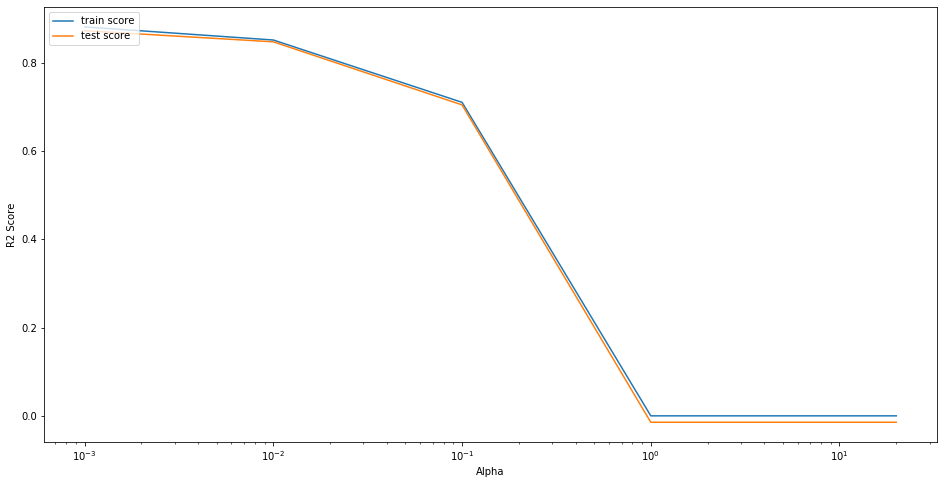

In [60]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Checking the best parameter(Alpha value)

In [61]:
best_alpha_l=model_cv_lasso.best_params_
best_alpha_l

{'alpha': 0.001}

In [62]:
lasso=Lasso(alpha=model_cv_lasso.best_params_["alpha"])
lasso.fit(X_train,y_train)

y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8804074149121737
0.8259213770015921


### Error distributions for train and test set

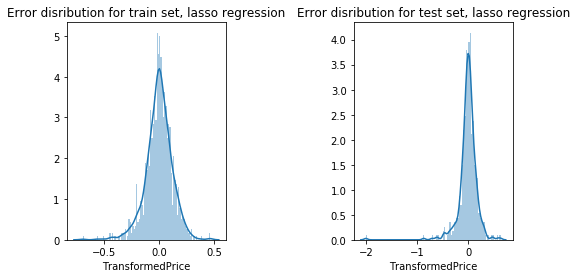

In [92]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_train_pred), bins = 100)
plt.title('Error disribution for train set, lasso regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_test_pred), bins = 100)
plt.title('Error disribution for test set, lasso regression')
plt.subplots_adjust(wspace = .8)

##### The error distributions for training and test set are normal.

In [63]:
model_param=list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols=X.columns
cols.insert(0,'const')
lasso_coef =pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns=['Featuere','Coef']

In [64]:
var_coeff=list(zip(cols,model_param))

In [65]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,LotFrontage,11.843616
6,MasVnrArea,0.166148
1,LotArea,0.126931
47,Exterior1st_BrkComm,0.109341
46,Exterior1st_AsphShn,0.103184
49,Exterior1st_CBlock,0.074849
10,BsmtCond,0.070859
22,GrLivArea,0.055570
2,LotShape,0.054353
23,BsmtFullBath,0.041417


## Ridge regression model

##### Let's try ridge regression for alpha=0.001

In [66]:
ridge=Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred=ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred=ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9046963506148656
0.8043399720545221


 We can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

let's try to improve our model with the optimal value of alpha using GridSearchCV

In [67]:
#list of alpha values to tune
hyper_param={'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model=Ridge()
#cross validation
folds=KFold(n_splits=10,shuffle=True,random_state=42)
model_cv_ridge=GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv_ridge.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [68]:
cv_result_r=pd.DataFrame(model_cv_ridge.cv_results_)
cv_result_r['param_alpha']=cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020887,0.011240,0.007197,0.006566,0.001,{'alpha': 0.001},0.851003,0.886484,0.875104,0.842667,...,0.906946,0.906812,0.906157,0.903223,0.904867,0.905980,0.900789,0.904563,0.905324,0.001959
1,0.018587,0.011483,0.005350,0.004665,0.010,{'alpha': 0.01},0.851196,0.886524,0.874808,0.842654,...,0.906944,0.906810,0.906155,0.903221,0.904864,0.905977,0.900787,0.904560,0.905322,0.001959
2,0.015793,0.010201,0.005952,0.004931,0.100,{'alpha': 0.1},0.852944,0.886850,0.871948,0.842615,...,0.906771,0.906659,0.905978,0.903041,0.904658,0.905719,0.900600,0.904316,0.905130,0.001968
3,0.015567,0.007204,0.004585,0.002072,1.000,{'alpha': 1.0},0.861637,0.887732,0.859785,0.843308,...,0.902432,0.902467,0.902016,0.898365,0.899423,0.899219,0.896139,0.898967,0.900288,0.002098
4,0.016789,0.008582,0.006649,0.005748,5.000,{'alpha': 5.0},0.867473,0.887691,0.854324,0.841849,...,0.893153,0.893402,0.893885,0.888659,0.889522,0.887518,0.887807,0.888709,0.890537,0.002315


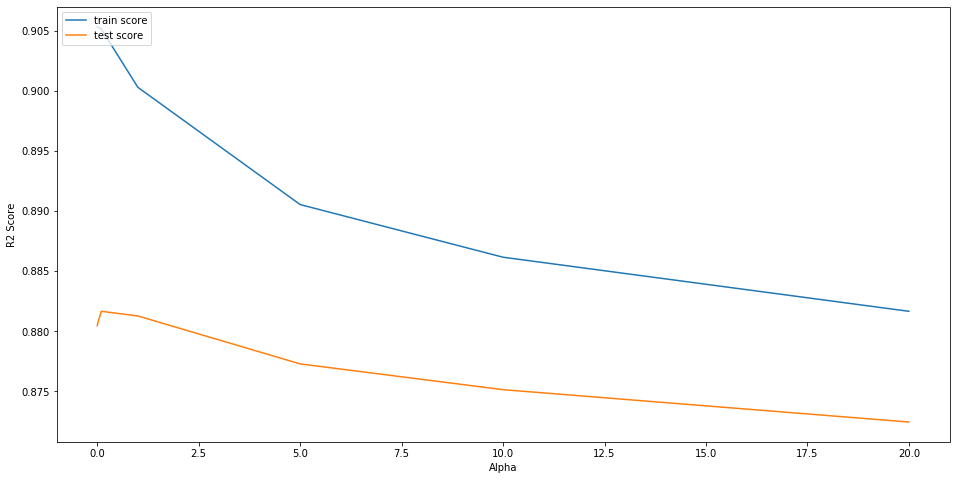

In [69]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
# Checking the best parameter(Alpha value)
best_alpha_r=model_cv_ridge.best_params_
best_alpha_r

{'alpha': 0.1}

In [71]:
ridge=Ridge(alpha=model_cv_ridge.best_params_["alpha"])
ridge.fit(X_train,y_train)

y_pred_train=ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test=ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9045322966898738
0.8088606740448486


### Error distributions for train and test set

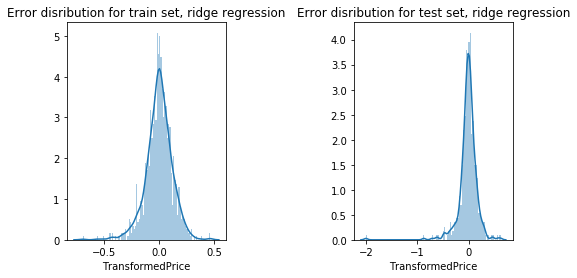

In [91]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_train_pred), bins = 100)
plt.title('Error disribution for train set, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_test_pred), bins = 100)
plt.title('Error disribution for test set, ridge regression')
plt.subplots_adjust(wspace = .8)

##### The error distributions for training and test set are normal.

In [72]:
model_parameter=list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols=X.columns
cols.insert(0,'constant')
ridge_coef=pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns=['Feaure','Coef']

In [73]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotFrontage,11.398674
47,Exterior1st_BrkComm,0.574482
49,Exterior1st_CBlock,0.516477
50,Exterior1st_CemntBd,0.463104
48,Exterior1st_BrkFace,0.413417
19,CentralAir,0.383436
15,BsmtFinSF2,0.327742
22,GrLivArea,0.217123
33,GarageQual,0.188036
6,MasVnrArea,0.174099


### After creating model in both Ridge and Lasso we can see that the r2_scores difference between train and test is  large for Ridge compared to Lasso and also lasso will penalize more on the dataset and can also help in feature elemination i am going to consider that as final model.

### Final Model is Lasso

In [74]:
lasso = Lasso(alpha=model_cv_lasso.best_params_["alpha"])
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8804074149121737
0.8259213770015921


In [75]:
model_param=list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols=X.columns
cols.insert(0,'const')
lasso_coef =pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns=['Featuere','Coef']

In [76]:
var_coeff=list(zip(cols,model_param))

In [77]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,LotFrontage,11.843616
6,MasVnrArea,0.166148
1,LotArea,0.126931
47,Exterior1st_BrkComm,0.109341
46,Exterior1st_AsphShn,0.103184
49,Exterior1st_CBlock,0.074849
10,BsmtCond,0.070859
22,GrLivArea,0.055570
2,LotShape,0.054353
23,BsmtFullBath,0.041417


In [78]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('LotFrontage', 11.843615933963148),
 ('LotArea', 0.12693101012160224),
 ('LotShape', 0.05435302856288107),
 ('LandSlope', 0.010277157168368866),
 ('OverallCond', 0.040203924364030995),
 ('MasVnrArea', 0.16614821190587947),
 ('ExterCond', -0.06760247415641825),
 ('BsmtCond', 0.0708588629235393),
 ('TotalBsmtSF', -0.010379510022364535),
 ('GrLivArea', 0.05557019467832204),
 ('BsmtFullBath', 0.04141695759570129),
 ('HalfBath', 0.028142448196495366),
 ('GarageCars', -0.01620340484277029),
 ('3SsnPorch', -0.10689305522494257),
 ('ScreenPorch', -0.0324927754269338),
 ('YearBuilt_age', -0.11799782761040851),
 ('GarageYrBlt_age', -0.038557210835203394),
 ('Exterior1st_AsphShn', 0.10318427835930943),
 ('Exterior1st_BrkComm', 0.10934114995543515),
 ('Exterior1st_CBlock', 0.07484871513476024)]

##### After compairing both the model we can see that the below Features are best explaining the DataSet

In [79]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(house_price):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallCond', 'Exterior1st', 'MasVnrArea', 'ExterCond', 'BsmtCond', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'GarageCars', '3SsnPorch', 'ScreenPorch', 'YearBuilt_age', 'GarageYrBlt_age']
19


### Conclusions

<font color=blue> Optimum value for lambda in ridge regression is 0.1
<br>
Optimum value for lambda in lasso regression is 0.001
<br>
r2_score in train dataset: r2_score for ridge: 0.90, r2_score for lasso: 0.88
<br>
r2_score in test dataset: r2_score for ridge: 0.80, r2_score for lasso: 0.82
<br>
The 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallCond', 'Exterior1st', 'MasVnrArea', 'ExterCond', 'BsmtCond', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'GarageCars', '3SsnPorch', 'ScreenPorch', 'YearBuilt_age', 'GarageYrBlt_age' are the important features which have to be considered by the Surprise Housing company. </font>

### Code for Subjective Questions:

In [80]:
# building the ridge model with double alpha values
ridge_2=Ridge(alpha=model_cv_ridge.best_params_["alpha"]*2)
ridge_2.fit(X_train,y_train)
y_train_pred=ridge_2.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred=ridge_2.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9041579567270834
0.8120154880782409


In [81]:
model_parameter=list(ridge_2.coef_)
model_parameter.insert(0,ridge_2.intercept_)
cols=X.columns
cols.insert(0,'constant')
ridge_coef=pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns=['Feaure','Coef']

In [82]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotFrontage,11.435194
47,Exterior1st_BrkComm,0.535508
49,Exterior1st_CBlock,0.479102
50,Exterior1st_CemntBd,0.425256
48,Exterior1st_BrkFace,0.373447
19,CentralAir,0.322049
15,BsmtFinSF2,0.312752
22,GrLivArea,0.196861
6,MasVnrArea,0.173651
33,GarageQual,0.165994


In [83]:
# building the ridge model with double alpha values
lasso_2=Ridge(alpha=model_cv_lasso.best_params_["alpha"]*2)
lasso_2.fit(X_train,y_train)
y_train_pred=lasso_2.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred=lasso_2.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.904696289089338
0.804395513464078


In [84]:
model_parameter=list(lasso_2.coef_)
model_parameter.insert(0,lasso_2.intercept_)
cols=X.columns
cols.insert(0,'constant')
lasso_coef=pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns=['Feaure','Coef']

In [85]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotFrontage,11.356295
47,Exterior1st_BrkComm,0.619660
49,Exterior1st_CBlock,0.559809
50,Exterior1st_CemntBd,0.507054
19,CentralAir,0.469607
48,Exterior1st_BrkFace,0.459970
15,BsmtFinSF2,0.344278
22,GrLivArea,0.242443
33,GarageQual,0.215653
34,WoodDeckSF,0.185924


So, by doubling the alpha parameter, the r2_score remains the same, but there is some change in features coefficients.